# Task A

In [1]:
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import torch

## Read data from file

In [2]:
length = []
weight = []
with open('length_weight.csv', newline='') as csv_file:
    csv_file.readline()
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        length.append(float(row[0]))
        weight.append(float(row[1]))

In [3]:
x_train = torch.tensor(length).reshape(-1, 1)
y_train = torch.tensor(weight).reshape(-1, 1)

In [4]:
class LinearRegressionModel: 
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)
        
    def f(self, x):
        return x @ self.W + self.b
    
    def loss(self, x, y):
        #return torch.mean(torch.square(self.f(x) - y))
        return torch.nn.functional.mse_loss(self.f(x), y)

In [5]:
model = LinearRegressionModel()

## Optimizing

In [6]:
optimizer = torch.optim.SGD([model.b, model.W], 0.00015)
for epoch in range(100000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()
print('Done')

Done


## Results

In [7]:
print('W = %s, b = %s, loss = %s' % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[0.2187]], requires_grad=True), b = tensor([[-6.8682]], requires_grad=True), loss = tensor(1.1444, grad_fn=<MseLossBackward>)


## Plotting

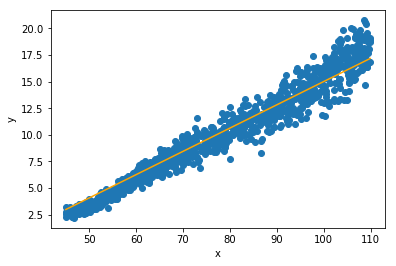

In [10]:
plt.scatter(x_train, y_train, label='$(\\hat x^{(i)}, \\hat y^{(i)})$')
#plt.plot(x_train, y_train, 'o', label='$(\\hat x^{(i)}, \\hat y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])
#plt.plot(x, model.f(x).detach(), label='$y = f(x) = xW+b$')
plt.plot(x.tolist(), model.f(x).detach().tolist(), color='orange')
plt.show()